[![GitHub issues by-label](https://img.shields.io/github/issues-raw/pfebrer/sisl/PdosPlot?style=for-the-badge)](https://github.com/pfebrer/sisl/labels/PdosPlot)

    
    
PdosPlot
=========

In [1]:
import sisl
import sisl.viz
# This is just for convenience to retreive files
siesta_files = sisl._environ.get_environ_variable("SISL_FILES_TESTS") / "sisl" / "io" / "siesta"

We are going to get the PDOS from a SIESTA `.PDOS` file, but we could get it from a hamiltonian as well.

In [2]:
plot = sisl.get_sile(siesta_files / "SrTiO3.PDOS").plot(Erange=[-10,10])

By default, a PDOS plot shows the total density of states:

In [3]:
plot

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'color': 'black', 'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'DOS',
              'opacity': 1,
              'type': 'scatter',
              'uid': '2672fff1-bc58-4bd7-9f2c-c63c661ae364',
              'x': array([0.        , 0.        , 0.        , ..., 0.77622945, 0.65886423,
                          0.5341191 ]),
              'y': array([-9.97920019, -9.95419189, -9.92918359, ...,  9.9274141 ,  9.95242241,
                           9.97743072])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-9.97920019, 9.97743072], 'title': {'text': 'Energy [eV]'}}}
})

## PDOS requests

There's a very important setting in the `PdosPlot`: `requests`. This setting expects a list of PDOS requests, where each request is a dictionary that can specify 
- `species`
- `atoms`
- `orbitals` (the orbital name)
- `n`, `l`, `m` (the quantum numbers)
- `Z` (the Z shell of the orbital)
- `spin`

involved in the PDOS line that you want to draw. Apart from that, a request also accepts the `name`, `color`, `linewidth` and `dash` keys that manage the aesthetics of the line and `normalize`, which indicates if the PDOS should be normalized (divided by number of orbitals).

Here is an example of how to use the `requests` setting to create a line that displays the Oxygen 2p PDOS:

In [4]:
plot.update_settings(requests=[{"name": "My first PDOS (Oxygen)", "species": ["O"], "n": 2, "l": 1}])
# or (it's equivalent)
plot.update_settings(requests=[{
    "name": "My first PDOS (Oxygen)", "species": ["O"],
    "orbitals": ["2pzZ1", "2pzZ2", "2pxZ1", "2pxZ2", "2pyZ1", "2pyZ2"]
}])

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1},
              'mode': 'lines',
              'name': 'My first PDOS (Oxygen)',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'd024dd44-bfb4-4636-8036-acc5248ee6c5',
              'x': array([0.        , 0.        , 0.        , ..., 0.15340499, 0.13159109,
                          0.10761675]),
              'y': array([-9.97920019, -9.95419189, -9.92918359, ...,  9.9274141 ,  9.95242241,
                           9.97743072])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-9.97920019, 9.97743072], 'title': {'text': 'Energy [eV]'}}}
})

And now we are going to create three lines, one for each species

In [5]:
plot.update_settings(requests=[
    {"name": "Oxygen", "species": ["O"], "color": "darkred", "dash": "dash", "normalize": True},
    {"name": "Titanium", "species": ["Ti"], "color": "grey", "linewidth": 3, "normalize": True},
    {"name": "Sr", "species": ["Sr"], "color": "green", "normalize": True},
], Erange=[-5, 5])

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'color': 'darkred', 'dash': 'dash', 'width': 1},
              'mode': 'lines',
              'name': 'Oxygen',
              'opacity': 1,
              'type': 'scatter',
              'uid': '6150b72d-9a58-4a35-bf60-06af3986dcb9',
              'x': array([0.02951046, 0.0254133 , 0.02184542, ..., 0.00188649, 0.00183433,
                          0.00185073]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'color': 'grey', 'dash': 'solid', 'width': 3.0},
              'mode': 'lines',
              'name': 'Titanium',
              'opacity': 1,
              'type': 'scatter',
              'uid': '07542b22-39fd-4041-82f5-20d9723bddc8',
              'x': array([0.01556405, 0.01305467, 0.01097282, ..., 0.01763474, 0.01660872,
                          0.01612746]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'color': 'green', 'dash': 'solid', 'width': 1},
              'mode': 'lines',
              'name': 'Sr',
              'opacity': 1,
              'type': 'scatter',
              'uid': '31e0df4b-7038-4124-88ea-48744dd8ec36',
              'x': array([0.00945645, 0.00797081, 0.00654374, ..., 0.0050356 , 0.00413663,
                          0.00367983]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

It's interesting to note that the `atoms` key of each request accepts the same possibilities as the `atoms` argument of the `Geometry` methods. Therefore, **you can use indices, categories, dictionaries, strings...**

For example:

In [6]:
# Let's import the AtomZ and AtomOdd categories just to play with them
from sisl.geom import AtomZ, AtomOdd

plot.update_settings(requests=[
    {"atoms": [0,1], "name": "Atoms 0 and 1"},
    {"atoms": {"Z": 8}, "name": "Atoms with Z=8"},
    {"atoms": AtomZ(8) & ~ AtomOdd(), "name": "Oxygens with even indices"}
])

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1},
              'mode': 'lines',
              'name': 'Atoms 0 and 1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '003369dd-d873-4826-bba2-b56224645d65',
              'x': array([0.42810729, 0.35963014, 0.30009591, ..., 0.40555853, 0.37347853,
                          0.3579393 ]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1},
              'mode': 'lines',
              'name': 'Atoms with Z=8',
              'opacity': 1,
              'type': 'scatter',
              'uid': '4b13723f-3e07-4df5-8c00-2c328dc865cf',
              'x': array([1.15090812, 0.99111853, 0.85197153, ..., 0.07357313, 0.07153886,
                          0.07217842]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1},
              'mode': 'lines',
              'name': 'Oxygens with even indices',
              'opacity': 1,
              'type': 'scatter',
              'uid': '2992da02-d06b-4df9-9fa1-ef129521f057',
              'x': array([0.76727207, 0.66074568, 0.56798101, ..., 0.04904875, 0.04769258,
                          0.04811895]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

## Easy and fast DOS splitting

As you might have noticed, sometimes it might be cumbersome to build all the requests you want. If your needs are simple and you don't need the flexibility of defining every parameter by yourself, there is a set of methods that will help you explore your PDOS data faster than ever before. These are: `split_DOS`, `split_requests`, `update_requests`, `remove_requests` and `add_requests`.?

Let's begin with `split_DOS`. As you can imagine, this method splits the density of states:

In [7]:
plot.split_DOS()

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | species=Sr',
              'opacity': 1,
              'type': 'scatter',
              'uid': '151367e3-8a06-43d8-91b3-de91bfd2be14',
              'x': array([0.13239034, 0.11159135, 0.09161241, ..., 0.07049844, 0.0579128 ,
                          0.05151756]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | species=Ti',
              'opacity': 1,
              'type': 'scatter',
              'uid': '0b728344-95dc-41f6-9db7-1920dfcceff0',
              'x': array([0.29571695, 0.24803879, 0.2084835 , ..., 0.33506009, 0.31556573,
                          0.30642174]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | species=O',
              'opacity': 1,
              'type': 'scatter',
              'uid': '9af20e5c-c3d3-47d7-b817-1d808a1cfe8e',
              'x': array([1.15090812, 0.99111853, 0.85197153, ..., 0.07357313, 0.07153886,
                          0.07217842]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

By default, it splits on the different species, but you can use the `on` argument to change that.

In [8]:
plot.split_DOS(on="atoms")

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'a1131f72-7e1e-4384-ad94-3feec177e46a',
              'x': array([0.13239034, 0.11159135, 0.09161241, ..., 0.07049844, 0.0579128 ,
                          0.05151756]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=1',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'd02a9e19-e5b8-47b2-8619-6f18d83e0a52',
              'x': array([0.29571695, 0.24803879, 0.2084835 , ..., 0.33506009, 0.31556573,
                          0.30642174]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '4f7ed114-2a5e-45cf-b1d8-7081cf943fa5',
              'x': array([0.38363602, 0.33037283, 0.2839905 , ..., 0.02452438, 0.02384629,
                          0.02405948]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=3',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'b335670a-a997-4d2d-9f65-c0d35a4437ce',
              'x': array([0.38363605, 0.33037285, 0.28399051, ..., 0.02452438, 0.02384629,
                          0.02405947]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=4',
              'opacity': 1,
              'type': 'scatter',
              'uid': '2781fb94-f9aa-48ac-a178-b078609347b5',
              'x': array([0.38363605, 0.33037285, 0.28399051, ..., 0.02452438, 0.02384629,
                          0.02405947]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

Now we have the contribution of each atom.

But here comes the powerful part: `split_DOS` accepts as keyword arguments all the keys that a request accepts. Then, it adds that extra constrain to the splitting by adding the value to each request. So, if we want to get the separate contributions of all oxygen atoms, **we can impose an extra constraint** on species:

In [9]:
plot.split_DOS(on="atoms", species=["O"], name="Oxygen $atoms")

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen 2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '1cddac47-52bb-4518-8f76-2e180f67f6da',
              'x': array([0.38363602, 0.33037283, 0.2839905 , ..., 0.02452438, 0.02384629,
                          0.02405948]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen 3',
              'opacity': 1,
              'type': 'scatter',
              'uid': '93066a03-3175-4c3c-bf0e-59a95618da0b',
              'x': array([0.38363605, 0.33037285, 0.28399051, ..., 0.02452438, 0.02384629,
                          0.02405947]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen 4',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'ab99285d-c2bf-4a5c-a250-a3c937b9812e',
              'x': array([0.38363605, 0.33037285, 0.28399051, ..., 0.02452438, 0.02384629,
                          0.02405947]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

and then we have only the oxygen atoms, which are all equivalent.

Note that we also set a name for all requests, with the additional twist that we used the templating supported by `split_DOS`. If you are splitting on `parameter`, you can use `$parameter` inside your name and the method will replace it with the value for each request. In this case `parameter` was `atoms`, but it could be anything you are splitting the DOS on.

You can also **exclude some values of the parameter you are splitting on**:

In [10]:
plot.split_DOS(on="atoms", exclude=[1,3])

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'c1d78a5d-9bac-4ba4-b184-7206ae44c028',
              'x': array([0.13239034, 0.11159135, 0.09161241, ..., 0.07049844, 0.0579128 ,
                          0.05151756]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '7fad2c1a-d30d-4107-9090-946f562e7e4b',
              'x': array([0.38363602, 0.33037283, 0.2839905 , ..., 0.02452438, 0.02384629,
                          0.02405948]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=4',
              'opacity': 1,
              'type': 'scatter',
              'uid': '1aa77a87-fa12-44c9-82db-44fb4c682a95',
              'x': array([0.38363605, 0.33037285, 0.28399051, ..., 0.02452438, 0.02384629,
                          0.02405947]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

Or **indicate the only values that you want**:

In [11]:
plot.split_DOS(on="atoms", only=[0,2])

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'c2610536-ed4c-4ea2-b2e9-aafb0ec3b52d',
              'x': array([0.13239034, 0.11159135, 0.09161241, ..., 0.07049844, 0.0579128 ,
                          0.05151756]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': ' | atoms=2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '17825773-44c2-4cd4-9767-5c58859824d1',
              'x': array([0.38363602, 0.33037283, 0.2839905 , ..., 0.02452438, 0.02384629,
                          0.02405948]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

Finally, if you want to split on multiple parameters at the same time, you can use `+` between different parameters. For example, to get all the oxygen orbitals:

In [12]:
plot.split_DOS(on="n+l+m", species=["O"], name="Oxygen")

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen | n=3, l=2, m=-2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '5e5c4027-51ec-4593-b8c7-503500354363',
              'x': array([1.17037389e-04, 9.58428463e-05, 7.56231851e-05, ..., 6.11713094e-06,
                          4.99737966e-06, 4.06993882e-06]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen | n=3, l=2, m=-1',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'a4386e5d-bbd3-4aae-8bc9-17eca2f252ca',
              'x': array([1.17037378e-04, 9.58428358e-05, 7.56231758e-05, ..., 6.11712949e-06,
                          4.99737797e-06, 4.06993740e-06]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen | n=3, l=2, m=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': '23b81b95-0d3e-4769-808c-486788e9fc02',
              'x': array([8.07616978e-05, 6.90785829e-05, 6.00892797e-05, ..., 1.19134255e-03,
                          1.15917159e-03, 1.17946996e-03]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen | n=3, l=2, m=1',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'a6d51187-6be8-46a4-a757-11d9c4626bb3',
              'x': array([1.17037377e-04, 9.58428357e-05, 7.56231757e-05, ..., 6.11712946e-06,
                          4.99737794e-06, 4.06993737e-06]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen | n=3, l=2, m=2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '4ac9e66c-7064-42a0-95d7-d94524b626e8',
              'x': array([8.07617161e-05, 6.90785926e-05, 6.00892825e-05, ..., 1.19134373e-03,
                          1.15917257e-03, 1.17947075e-03]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen | n=2, l=0, m=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': '9841d5e6-f231-4f82-b188-4fdf5d1147ea',
              'x': array([0.00397082, 0.00333006, 0.00278558, ..., 0.01906487, 0.01644679,
                          0.01453921]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen | n=2, l=1, m=-1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '9d34c891-cea7-41f7-813a-392e2e5bef09',
              'x': array([0.38214156, 0.32912093, 0.2829463 , ..., 0.01736907, 0.01758624,
                          0.01842268]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Oxygen | n=2, l=1, m=0',
              'opacity': 1,
              'type': 'sc

## Managing existing requests

Not only you can create requests easily with `split_DOS`, but it's also easy to manage the requests that you have created. 

The methods that help you accomplish this are `split_requests`, `update_requests`, `remove_requests`. All three methods accept an undefined number of arguments that are used to select the requests you want to act on. You can refer to requests by their name (using a `str`) or their position (using an `int`). It's very easy to understand with examples. Then, keyword arguments depend on the functionality of each method.

For example, let's say that we have splitted the DOS on species

In [13]:
plot.split_DOS(name="$species")

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'e24c594e-296b-493b-ad10-85b88002b8d8',
              'x': array([0.13239034, 0.11159135, 0.09161241, ..., 0.07049844, 0.0579128 ,
                          0.05151756]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Ti',
              'opacity': 1,
              'type': 'scatter',
              'uid': '21a8b352-65b2-4b40-b156-2eacb4e6b080',
              'x': array([0.29571695, 0.24803879, 0.2084835 , ..., 0.33506009, 0.31556573,
                          0.30642174]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'O',
              'opacity': 1,
              'type': 'scatter',
              'uid': '6146411f-b271-4fdf-bbe5-12de37db6431',
              'x': array([1.15090812, 0.99111853, 0.85197153, ..., 0.07357313, 0.07153886,
                          0.07217842]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

and we want to remove the Sr and O lines. That's easy:

In [14]:
plot.remove_requests("Sr", 2)

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Ti',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'e27b203b-def8-41ff-9338-49c8fa664112',
              'x': array([0.29571695, 0.24803879, 0.2084835 , ..., 0.33506009, 0.31556573,
                          0.30642174]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

We have indicated that we wanted to remove the request with name `"Sr"` and the 2nd request. Simple, isn't it?

Now that we know how to indicate the requests that we want to act on, let's use it to get the total `Sr` contribution, and then the `Ti` and `O` contributions splitted by `n` and `l`.

It sounds difficult, but it's actually not. Just split the DOS on species:

In [15]:
plot.split_DOS(name="$species", normalize=True)

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr',
              'opacity': 1,
              'type': 'scatter',
              'uid': '669ffd75-c0ed-4132-9e16-abb034215cd5',
              'x': array([0.00945645, 0.00797081, 0.00654374, ..., 0.0050356 , 0.00413663,
                          0.00367983]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Ti',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'fe535171-add3-4670-9e2e-dee42afe5939',
              'x': array([0.01556405, 0.01305467, 0.01097282, ..., 0.01763474, 0.01660872,
                          0.01612746]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'O',
              'opacity': 1,
              'type': 'scatter',
              'uid': '34d1b5f5-701b-4bdd-8216-a4998145a348',
              'x': array([0.02951046, 0.0254133 , 0.02184542, ..., 0.00188649, 0.00183433,
                          0.00185073]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])}],
    'layout': {'showlegend': True,
               'template': '...',
               'xaxis': {'mirror': True, 'title': {'text': 'Density of states [1/eV]'}},
               'yaxis': {'mirror': True, 'range': [-4.977538290000001, 4.975768842], 'title': {'text': 'Energy [eV]'}}}
})

And then use `split_requests` to split only the requests that we want to split:

In [16]:
plot.split_requests("Sr", 2, on="n+l", dash="dot")

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 1.0},
              'mode': 'lines',
              'name': 'Ti',
              'opacity': 1,
              'type': 'scatter',
              'uid': '613e8289-c855-45ef-be78-8f52b21f058d',
              'x': array([0.01556405, 0.01305467, 0.01097282, ..., 0.01763474, 0.01660872,
                          0.01612746]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=4, l=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'b8cfd7d4-59cd-402d-9f22-c6d9684de37f',
              'x': array([7.00005563e-04, 5.75196643e-04, 4.53763743e-04, ..., 2.80436830e-07,
                          3.89337458e-07, 5.10741595e-07]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=5, l=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'dfcdfb65-dc38-493f-9253-4d002595f996',
              'x': array([0.03986878, 0.03256331, 0.02546913, ..., 0.00187069, 0.00257145,
                          0.00335506]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=4, l=1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '3ffbf3fd-3b66-409c-915e-318a125b80e2',
              'x': array([3.55594240e-03, 3.74451813e-03, 3.96310761e-03, ..., 3.38897634e-06,
                          3.07893883e-06, 3.01000132e-06]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=5, l=1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '7636c4c5-0fea-498d-98ca-a680f6c3388c',
              'x': array([7.93731903e-04, 8.14745957e-04, 8.41146554e-04, ..., 3.25562760e-05,
                          3.23730450e-05, 3.39447819e-05]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=4, l=2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '0e1e6119-f70a-4639-9750-68ef8f094a48',
              'x': array([0.00778075, 0.00644235, 0.00516152, ..., 0.01332979, 0.01053263,
                          0.00893921]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'O | n=3, l=2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '93e04bbc-b22d-425f-a233-97fb67c4a28a',
              'x': array([3.41757038e-05, 2.83790462e-05, 2.31365399e-05, ..., 1.60069178e-04,
                          1.55555753e-04, 1.58076701e-04]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'O | n=2, l=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'f3fc98e0-1c7a-41ac-b5ea-640e9ae15a22',
              'x': array([0.0006618 , 0.00055501, 0.00046

Notice how we've also set `dash` for all the requests that `split_requests` has generated. We can do this because `split_requests` works exactly as `split_DOS`, with the only difference that splits specific requests.

Just as a last thing, we will let you figure out how `update_requests` works:

In [17]:
plot.update_requests("Ti", color="red", linewidth=2)

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'line': {'color': 'red', 'dash': 'solid', 'width': 2.0},
              'mode': 'lines',
              'name': 'Ti',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'ba6397a5-5d25-42f2-9329-4292a705d92b',
              'x': array([0.01556405, 0.01305467, 0.01097282, ..., 0.01763474, 0.01660872,
                          0.01612746]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=4, l=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': 'd667f998-36f1-4479-9d68-ca6d7f68f878',
              'x': array([7.00005563e-04, 5.75196643e-04, 4.53763743e-04, ..., 2.80436830e-07,
                          3.89337458e-07, 5.10741595e-07]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=5, l=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': '06c7dd69-92a7-48b8-b3e2-d89a3e465976',
              'x': array([0.03986878, 0.03256331, 0.02546913, ..., 0.00187069, 0.00257145,
                          0.00335506]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=4, l=1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '218ac961-d98e-45f4-b527-25e7f5b994bd',
              'x': array([3.55594240e-03, 3.74451813e-03, 3.96310761e-03, ..., 3.38897634e-06,
                          3.07893883e-06, 3.01000132e-06]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=5, l=1',
              'opacity': 1,
              'type': 'scatter',
              'uid': '4465fe4e-1cdd-4b4b-b3ac-87f21af1726f',
              'x': array([7.93731903e-04, 8.14745957e-04, 8.41146554e-04, ..., 3.25562760e-05,
                          3.23730450e-05, 3.39447819e-05]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'Sr | n=4, l=2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '651e4549-38e6-4013-84eb-289fd632f0a1',
              'x': array([0.00778075, 0.00644235, 0.00516152, ..., 0.01332979, 0.01053263,
                          0.00893921]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'O | n=3, l=2',
              'opacity': 1,
              'type': 'scatter',
              'uid': '761c265d-0ba4-401b-9b86-5394d0980ef7',
              'x': array([3.41757038e-05, 2.83790462e-05, 2.31365399e-05, ..., 1.60069178e-04,
                          1.55555753e-04, 1.58076701e-04]),
              'y': array([-4.97753829, -4.95252999, -4.92752169, ...,  4.92575222,  4.95076053,
                           4.97576884])},
             {'line': {'dash': 'dot', 'width': 1.0},
              'mode': 'lines',
              'name': 'O | n=2, l=0',
              'opacity': 1,
              'type': 'scatter',
              'uid': '4899854a-b490-44cc-a88c-47cdecfd08fc',
              'x': array([0.0006618 , 0.0

We hope you enjoyed what you learned!

-----
This next cell is just to create the thumbnail for the notebook in the docs 

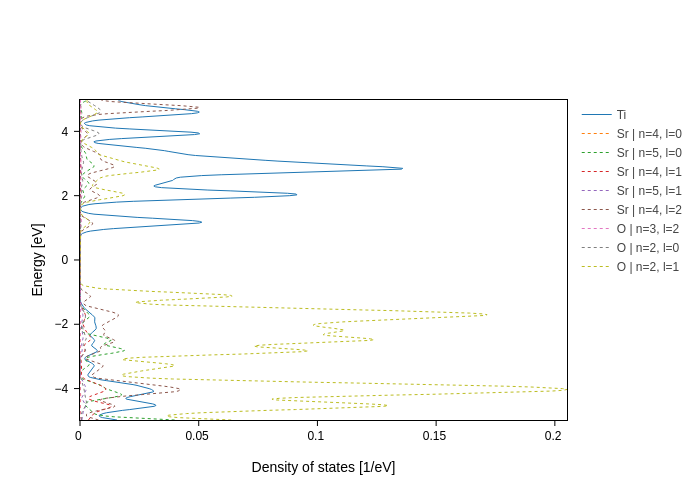

In [18]:
thumbnail_plot = plot.update_requests("Ti", color=None, linewidth=1)

if thumbnail_plot:
    thumbnail_plot.show("png")

-------------